In [26]:
import torch

from sbi import analysis as analysis
from sbi import utils as utils
from sbi.inference.base import infer
import matplotlib.pyplot as plt
from sbi.analysis import pairplot

In [27]:
from toy_posterior_for_07_cc import ExamplePosterior

posterior = ExamplePosterior()

In [28]:
x_o = torch.ones(1, 20)  # simulator output was 20-dimensional
posterior.set_default_x(x_o)

### List of current options
samples: Samples used to build the histogram.

points: List of additional points to scatter.

limits: Array containing the plot xlim for each parameter dimension. If None,
    just use the min and max of the passed samples

subset: List containing the dimensions to plot. E.g. subset=[1,3] will plot
    plot only the 1st and 3rd dimension but will discard the 0th and 2nd (and,
    if they exist, the 4th, 5th and so on).

offdiag: Plotting style for upper diagonal, {hist, scatter, contour, cond,
    None}.

upper: deprecated, use offdiag instead.

diag: Plotting style for diagonal, {hist, cond, None}.

figsize: Size of the entire figure.

labels: List of strings specifying the names of the parameters.

ticks: Position of the ticks.

fig: matplotlib figure to plot on.

axes: matplotlib axes corresponding to fig.

**kwargs: Additional arguments to adjust the plot, e.g., `samples_colors`,
    `points_colors` and many more, see the source code in `_get_default_opts()`
    in `sbi.analysis.plot` for details.

In [34]:
# Current get_default_opts() function

def _get_default_opts():
    """Return default values for plotting specs."""
    return {
        # 'lower': None,     # hist/scatter/None  # TODO: implement
        # title and legend
        "title": None,
        "legend": False,
        "legend_kwargs": {},
        # labels
        "points_labels": [f"points_{idx}" for idx in range(10)],  # for points
        "samples_labels": [f"samples_{idx}" for idx in range(10)],  # for samples
        # colors: take even colors for samples, odd colors for points
        "samples_colors": plt.rcParams["axes.prop_cycle"].by_key()["color"][0::2],
        "points_colors": plt.rcParams["axes.prop_cycle"].by_key()["color"][1::2],
        # ticks
        "ticks": [],
        "tickformatter": mpl.ticker.FormatStrFormatter("%g"),  # type: ignore
        "tick_labels": None,
        # options for hist
        "hist_diag": {
            "alpha": 1.0,
            "bins": 50,
            "density": False,
            "histtype": "step",
        },
        "hist_offdiag": {
            # 'edgecolor': 'none',
            # 'linewidth': 0.0,
            "bins": 50,
        },
        # options for kde
        "kde_diag": {"bw_method": "scott", "bins": 50, "color": "black"},
        "kde_offdiag": {"bw_method": "scott", "bins": 50},
        # options for contour
        "contour_offdiag": {"levels": [0.68], "percentile": True},
        # options for scatter
        "scatter_offdiag": {
            "alpha": 0.5,
            "edgecolor": "none",
            "rasterized": False,
        },
        "scatter_diag": {},
        # options for plot
        "plot_offdiag": {},
        # formatting points (scale, markers)
        "points_diag": {},
        "points_offdiag": {
            "marker": ".",
            "markersize": 10,
        },
        # other options
        "fig_bg_colors": {"offdiag": None, "diag": None, "lower": None},
        "fig_subplots_adjust": {
            "top": 0.9,
        },
        "subplots": {},
        "despine": {
            "offset": 5,
        },
        "title_format": {"fontsize": 16},
    }

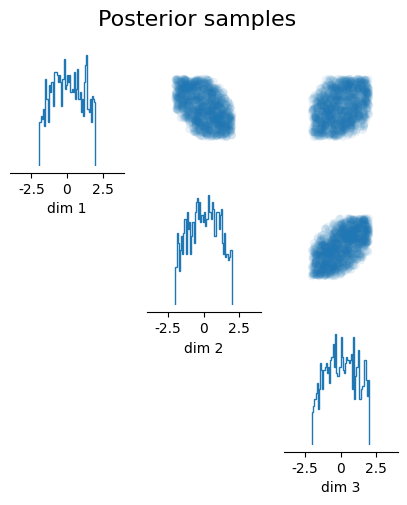

In [33]:
posterior_samples = posterior.sample((1000,))

fig, ax = pairplot(
    samples=posterior_samples,
    limits=torch.tensor([[-4.0, 4.0]] * 3),
    offdiag=["scatter"],
    diag=["hist"],
    figsize=(5, 5),
    title = "Posterior samples",
    scatter_offdiag ={"alpha":0.1},
)

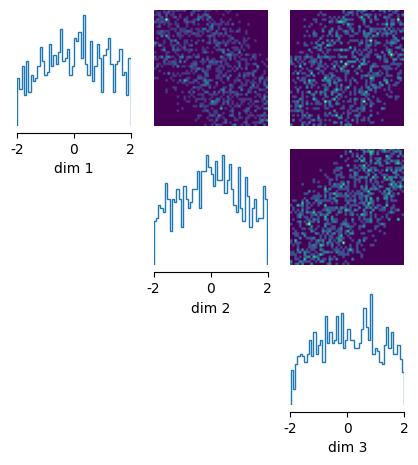

In [31]:
posterior_samples = posterior.sample((1000,))

fig, ax = pairplot(
    samples=posterior_samples,
    limits=torch.tensor([[-2.0, 2.0]] * 3),
    offdiag=["hist"],
    diag=["hist"],
    figsize=(5, 5),
)

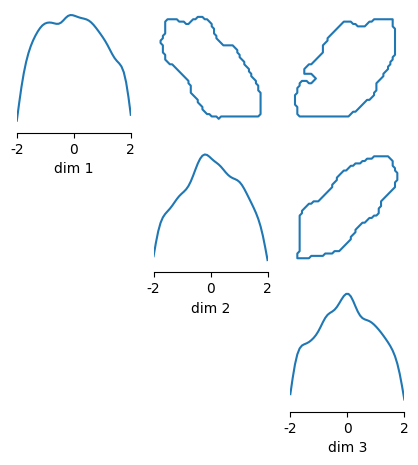

In [13]:
posterior_samples = posterior.sample((5000,))

fig, ax = pairplot(
    samples=posterior_samples,
    limits=torch.tensor([[-2.0, 2.0]] * 3),
    offdiag=["contour"],
    diag=["kde"],
    figsize=(5, 5),
)

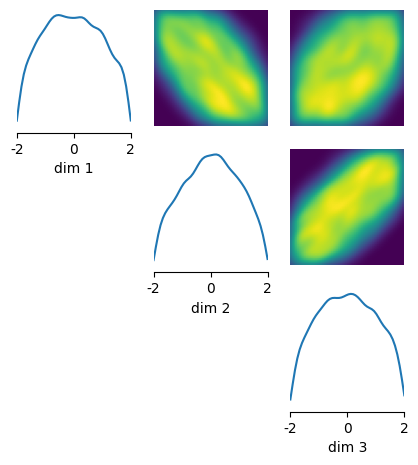

In [14]:
posterior_samples = posterior.sample((5000,))

fig, ax = pairplot(
    samples=posterior_samples,
    limits=torch.tensor([[-2.0, 2.0]] * 3),
    offdiag=["kde"],
    diag=["kde"],
    figsize=(5, 5),
)

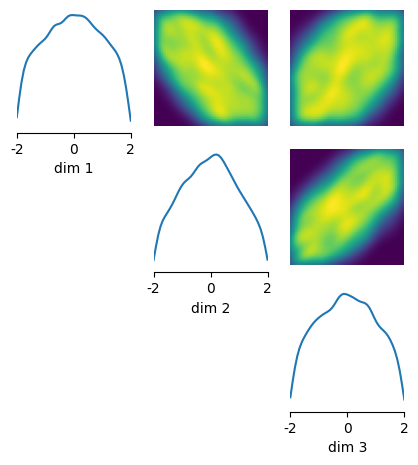

In [21]:
posterior_samples = posterior.sample((5000,))

fig, ax = pairplot(
    samples=posterior_samples,
    limits=torch.tensor([[-2.0, 2.0]] * 3),
    offdiag=["kde"],
    diag=["kde"],
    figsize=(5, 5),
)